# Quinn-Fernandes Estimator

Aimed and using the qnf.py file in this directory.

The following code runs a noiseless sinusoid through the estimator and plots it in a 3D graph widget.

In [47]:
import numpy as np
import scipy.signal as signal
from qnf import qnf

Nruns = 100
results = np.zeros(shape=(Nruns*Nruns,3))
run_number = 0
for omega in np.linspace(np.pi/Nruns,np.pi,Nruns):
    for phi in np.linspace(np.pi/Nruns,np.pi,Nruns):
        results[run_number] =  [omega,phi,qnf(np.sin(omega*np.arange(0,1000)+phi))[0]]
        run_number = run_number + 1
        
all_true_frequencies = np.reshape(results[:,0],[Nruns,Nruns])
true_frequencies = all_true_frequencies[:,1]
true_phases = np.reshape(results[:,1],[Nruns,Nruns])[1,:]
frequency_estimates = np.reshape(results[:,2],[Nruns,Nruns])

In [42]:
%matplotlib widget

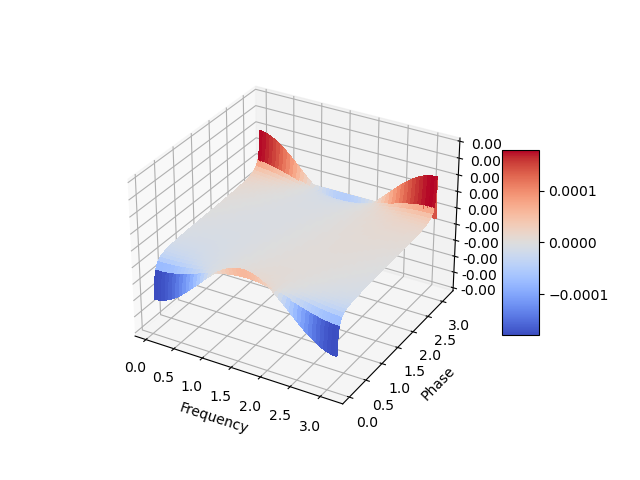

In [49]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X, Y = np.meshgrid(true_frequencies, true_phases)
Z = np.subtract(frequency_estimates,all_true_frequencies)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-0.0005, 0.0005)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')
ax.set_xlabel('Frequency')
ax.set_ylabel('Phase')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [73]:
%matplotlib inline

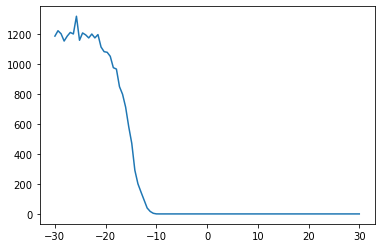

In [90]:
from numpy.random import default_rng
rng = default_rng()

T = 1024
Nruns = 1000
Nsnrs = 100
omega_true = np.pi/np.sqrt(2)
phase_true = 2*np.pi/np.sqrt(2)

SNRs_in_dB = np.linspace(-30,30,Nsnrs)

x_noiseless = np.sin(omega_true*np.linspace(0,T,T) + phase_true)

results = np.zeros(shape=(len(SNRs_in_dB)*Nruns,2))
run_number = 0

for SNR in SNRs_in_dB:
    noise_gain = np.power(10,-SNR/20)
    for run in np.arange(Nruns):
        x = x_noiseless + rng.standard_normal(T)*noise_gain
        results[run_number] = [SNR,qnf(x)[0]- omega_true]
        run_number = run_number +1

frequency_estimate_errors = np.reshape(results[:,1],[len(SNRs_in_dB),Nruns])
snr_number = 0
error_power = np.zeros_like(SNRs_in_dB)
for SNR in SNRs_in_dB:
    error_power[snr_number] = np.sum(np.power(frequency_estimate_errors[snr_number,:],2))
    snr_number = snr_number + 1
    


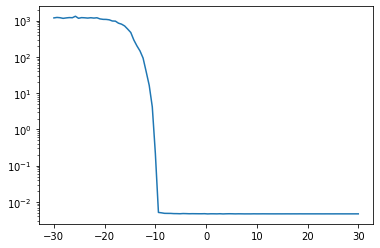

In [94]:
plt.semilogy(SNRs_in_dB, error_power)
Nsnrs = 100

import pickle
file = open('results-' + str(T) + '-' + str(Nruns) + '-' + str(Nsnrs) + '.dat', 'wb')
pickle.dump(results, file)
file.close()
 
with open('results-' + str(T) + '-' + str(Nruns) + '-' + str(Nsnrs) + '.dat', 'rb') as f:
    read_data = pickle.load(f)
